
Phase Flip Code
----------------

Phase flip code with error
----------------------


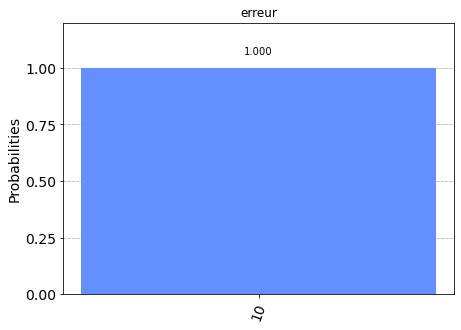

In [19]:
from qiskit import QuantumRegister, Aer, transpile
from qiskit import QuantumRegister, ClassicalRegister
from qiskit import QuantumCircuit, execute,IBMQ
from qiskit.tools.monitor import job_monitor
from qiskit.tools.visualization import plot_histogram, plot_state_city

print('\nPhase Flip Code')
print('----------------')


q = QuantumRegister(5,'q')
c = ClassicalRegister(2,'c')

circuit = QuantumCircuit(q,c)

circuit.cx(q[0],q[1])
circuit.cx(q[0],q[2])

circuit.h(q[0])
circuit.h(q[1])
circuit.h(q[2]) 
circuit.barrier()
circuit.z(q[2]) #Add this to simulate a phase flip error
circuit.barrier()
circuit.h(q[0])
circuit.h(q[1])
circuit.h(q[2])


circuit.cx(q[0], q[3])
circuit.cx(q[1], q[3])
circuit.cx(q[1], q[4])
circuit.cx(q[2], q[4])
circuit.barrier()
circuit.h(q[0])
circuit.h(q[1])
circuit.h(q[2])
circuit.barrier()
circuit.measure(q[3],c[0])
circuit.measure(q[4],c[1])

print("\nPhase flip code with error")
print("----------------------")
#print(counts)
circuit.draw('mpl')

simulator = Aer.get_backend('aer_simulator')
circ = transpile(circuit, simulator)

# Run and get counts
result = simulator.run(circ).result()
counts = result.get_counts(circ)
plot_histogram(counts, title='erreur')


Phase Flip Code
----------------

Phase flip code with error
----------------------


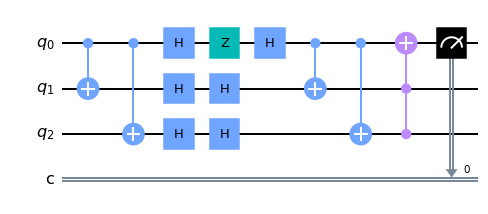

In [ ]:
from qiskit import QuantumRegister
from qiskit import QuantumRegister, ClassicalRegister
from qiskit import QuantumCircuit, execute,IBMQ
from qiskit.tools.monitor import job_monitor

print('\nPhase Flip Code')
print('----------------')

IBMQ.enable_account('18c3e76619e594b0b2bdf2398b4305831642f1d617caf4d46afa1fd8f977df9ac26f2134b53fc45561f30e5a4513a6d692688a6902add5f7d45322195300e02d')
provider = IBMQ.get_provider(hub='ibm-q')

backend = provider.get_backend('ibmq_belem')

q = QuantumRegister(5,'q')
c = ClassicalRegister(1,'c')

circuit = QuantumCircuit(q,c)

circuit.cx(q[0],q[1])
circuit.cx(q[0],q[2])

circuit.h(q[0])
circuit.h(q[1])
circuit.h(q[2]) 
circuit.z(q[0]) #Add this to simulate a phase flip error
circuit.h(q[0])
circuit.h(q[1])
circuit.h(q[2])

circuit.cx(q[0],q[1])
circuit.cx(q[0],q[2])
circuit.ccx(q[2],q[1],q[0])
circuit.measure(q[0],c[0])

job = execute(circuit, backend, shots=1000)

job_monitor(job)

counts = job.result().get_counts()

print("\nPhase flip code with error")
print("----------------------")
print(counts)